In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('cashew_data.csv')

In [4]:
df.head()

,img_path,mask_path,cls_name,specie_name,anomaly
0,cashew/Data/Images/Normal/062.JPG,NaN,cashew,NaN,0
1,cashew/Data/Images/Normal/253.JPG,NaN,cashew,NaN,0
2,cashew/Data/Images/Normal/393.JPG,NaN,cashew,NaN,0
3,cashew/Data/Images/Normal/408.JPG,NaN,cashew,NaN,0
4,cashew/Data/Images/Normal/426.JPG,NaN,cashew,NaN,0


In [17]:
class_list = np.unique(df['anomaly'])

In [25]:
print(class_list)

[0 1]


In [32]:
n_class = len(class_list)
palette = sns.hls_palette(n_class)
marker_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

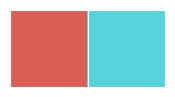

In [33]:
sns.palplot(palette)

# 随机打乱颜色列表和点型列表

In [34]:
import random
random.seed(1234)
random.shuffle(marker_list)
random.shuffle(palette)

# t-tns

In [35]:
encoding_array = np.load("cashew_visual_features.npy", allow_pickle=True)

In [36]:
encoding_array.shape

(600, 768)

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, max_iter=20000)
X_tsne_2d = tsne.fit_transform(encoding_array)

In [39]:
X_tsne_2d.shape

(600, 2)

## 可视化展示

In [40]:
# 不同的 符号 表示 不同的 标注类别
show_feature = 'anomaly'

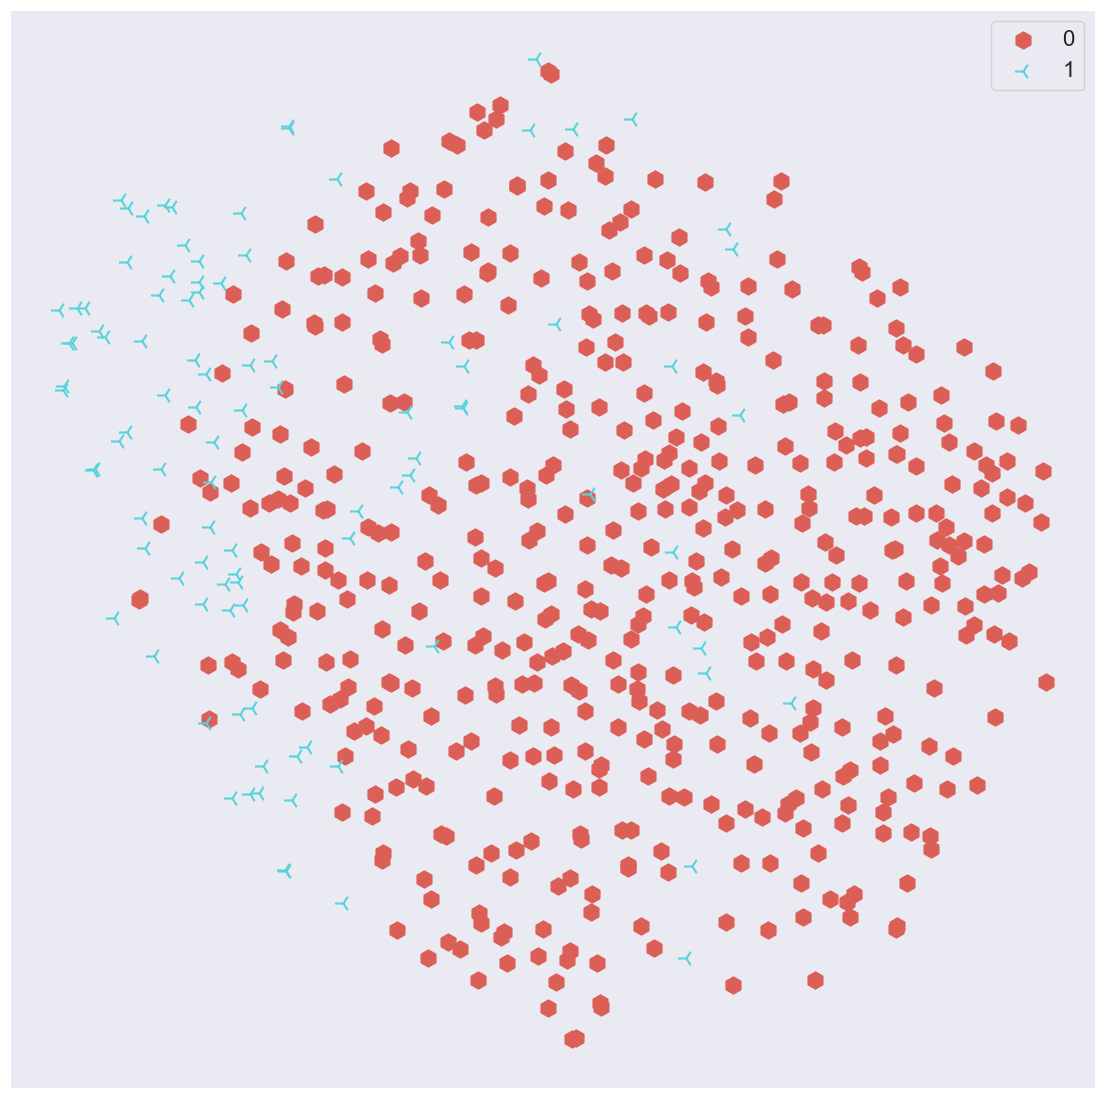

In [43]:
plt.figure(figsize=(14, 14))
for idx, class_name in enumerate(class_list):
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx]
    
    # 找到所有标注类别为当前类别点图像索引号
    indices = np.where(df[show_feature] == class_name)
    plt.scatter(X_tsne_2d[indices, 0], X_tsne_2d[indices, 1], color=color, marker=marker, label=class_name, s=150)
plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
# plt.savefig('语义特征t-SNE二维降维可视化.pdf', dpi=300) # 保存图像
plt.show()